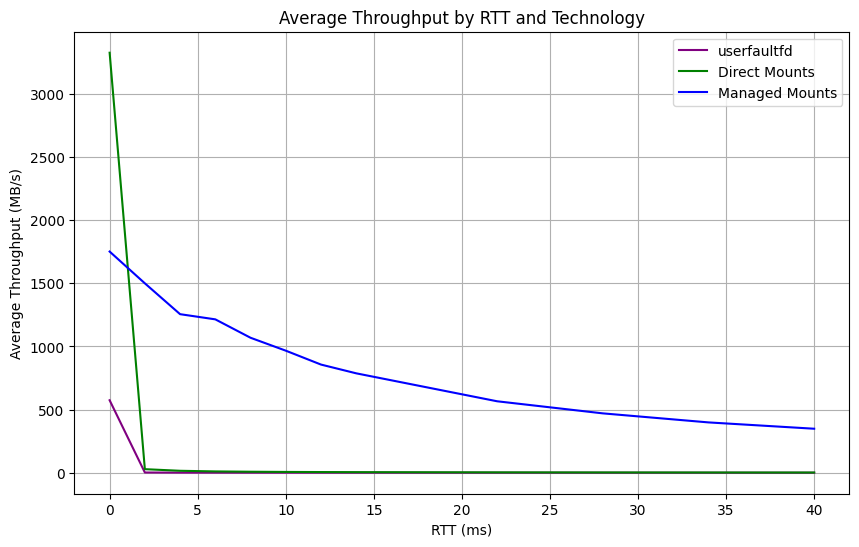

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../bench/throughput-rttvar/results.csv')

# Fill the missing values in 'RTT (ms)' column using forward fill method
df['RTT (ms)'] = df['RTT (ms)'].fillna(method='ffill')

# Convert RTT values to numeric by removing "ms" and convert it to integer for better plotting
df['RTT (ms)'] = df['RTT (ms)'].str.replace('ms', '').astype(int)

# Group by 'RTT (ms)' and calculate the average for each technology
df_grouped = df.groupby('RTT (ms)').mean().reset_index()

# Plotting with a different color scheme
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['RTT (ms)'], df_grouped['Throughput for userfaultfd (MB/s)'], label='userfaultfd', color='purple')
plt.plot(df_grouped['RTT (ms)'], df_grouped['Throughput for Direct Mounts (MB/s)'], label='Direct Mounts', color='green')
plt.plot(df_grouped['RTT (ms)'], df_grouped['Throughput for Managed Mounts (MB/s)'], label='Managed Mounts', color='blue')
plt.xlabel('RTT (ms)')
plt.ylabel('Average Throughput (MB/s)')
plt.title('Average Throughput by RTT and Technology')
plt.legend()
plt.grid(True)
plt.show()